In [2]:
import pandas as pd
import seaborn as sns

## Challenge 1

In [3]:
df_5_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
df_5_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
df_5_w3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
df_5_w4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
df_6_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')
df_6_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')
df_5_w1.shape

(206857, 11)

In [24]:
df = pd.concat([df_5_w1, df_5_w2, df_5_w3, df_5_w4, df_6_w1, df_6_w2]).reset_index()
df.shape

(1231795, 12)

In [5]:
df.head()

index   C/A  UNIT       SCP STATION LINENAME DIVISION        DATE  \
0      0  A002  R051  02-00-00   59 ST  NQR456W      BMT  04/27/2019   
1      1  A002  R051  02-00-00   59 ST  NQR456W      BMT  04/27/2019   
2      2  A002  R051  02-00-00   59 ST  NQR456W      BMT  04/27/2019   
3      3  A002  R051  02-00-00   59 ST  NQR456W      BMT  04/27/2019   
4      4  A002  R051  02-00-00   59 ST  NQR456W      BMT  04/27/2019   

       TIME     DESC  ENTRIES  \
0  00:00:00  REGULAR  7035249   
1  04:00:00  REGULAR  7035269   
2  08:00:00  REGULAR  7035292   
3  12:00:00  REGULAR  7035392   
4  16:00:00  REGULAR  7035651   

   EXITS                                                                 
0                                            2384833                     
1                                            2384840                     
2                                            2384875                     
3                                            2384951                     
4                                            2385020

## Challenge 2

In [25]:
#concat date and time columns

df['DATETIME'] = df['DATE'] + " " + df['TIME']
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME'] = pd.to_datetime(df['TIME'])

df = df.drop(columns = 'index')
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATETIME'],
      dtype='object')

## Challenge 3

In [38]:
df_group = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME']).agg('sum').reset_index()
#confirm no duplicate datetimes 
(df_group
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)
df_group

C/A  UNIT       SCP        STATION            DATETIME  ENTRIES  \
0         A002  R051  02-00-00          59 ST 2019-04-27 00:00:00  7035249   
1         A002  R051  02-00-00          59 ST 2019-04-27 04:00:00  7035269   
2         A002  R051  02-00-00          59 ST 2019-04-27 08:00:00  7035292   
3         A002  R051  02-00-00          59 ST 2019-04-27 12:00:00  7035392   
4         A002  R051  02-00-00          59 ST 2019-04-27 16:00:00  7035651   
...        ...   ...       ...            ...                 ...      ...   
1231778  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-05 17:00:00     5554   
1231779  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-05 21:00:00     5554   
1231780  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-06 01:00:00     5554   
1231781  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-06 05:00:00     5554   
1231782  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-06 09:00:00     5554   

         EXITS                                                                 
0                                                  2384833                     
1                                                  2384840                     
2                                                  2384875                     
3                                                  2384951                     
4                                                  2385020                     
...                                                    ...                     
1231778                                                379                     
1231779                                                379                     
1231780                                                379                     
1231781                                                379                     
1231782                                                379                     

[1231783 rows x 7 columns]

In [36]:
df_daily = (df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.first())
df_daily

C/A  UNIT       SCP        STATION       DATE  ENTRIES
0        A002  R051  02-00-00          59 ST 2019-04-27  7035249
1        A002  R051  02-00-00          59 ST 2019-04-28  7036100
2        A002  R051  02-00-00          59 ST 2019-04-29  7036746
3        A002  R051  02-00-00          59 ST 2019-04-30  7038242
4        A002  R051  02-00-00          59 ST 2019-05-01  7039729
...       ...   ...       ...            ...        ...      ...
203004  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-02     5554
203005  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-03     5554
203006  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-04     5554
203007  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-05     5554
203008  TRAM2  R469  00-05-01  RIT-ROOSEVELT 2019-06-06     5554

[203009 rows x 6 columns]

In [43]:
df_daily[['PREV_DATE', 'PREV_ENTRIES']] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])['DATE', 'ENTRIES']
                                    .apply(lambda grp: grp.shift(1)))

<ipython-input-43-bc70613c2733>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_daily[['PREV_DATE', 'PREV_ENTRIES']] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])['DATE', 'ENTRIES']


In [54]:
print(df_daily.shape)
df_daily.dropna(subset = ['PREV_DATE'], axis = 0, inplace = True)
print(df_daily.shape)

(198127, 8)
(198127, 8)


In [58]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    return counter

In [59]:
df_daily['DAILY_ENTRIES'] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)
df_daily.head()

C/A  UNIT       SCP STATION       DATE  ENTRIES  PREV_DATE  PREV_ENTRIES  \
1  A002  R051  02-00-00   59 ST 2019-04-28  7036100 2019-04-27     7035249.0   
2  A002  R051  02-00-00   59 ST 2019-04-29  7036746 2019-04-28     7036100.0   
3  A002  R051  02-00-00   59 ST 2019-04-30  7038242 2019-04-29     7036746.0   
4  A002  R051  02-00-00   59 ST 2019-05-01  7039729 2019-04-30     7038242.0   
5  A002  R051  02-00-00   59 ST 2019-05-02  7041303 2019-05-01     7039729.0   

   DAILY_ENTRIES  
1          851.0  
2          646.0  
3         1496.0  
4         1487.0  
5         1574.0

## Challenge 4

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [60]:
single_turn = df_daily[(df_daily['C/A'] == 'R236') & (df_daily['UNIT'] == 'R045') & 
                       (df_daily['SCP'] == '00-00-00') & (df_daily['STATION'] == 'GRD CNTRL-42 ST')]

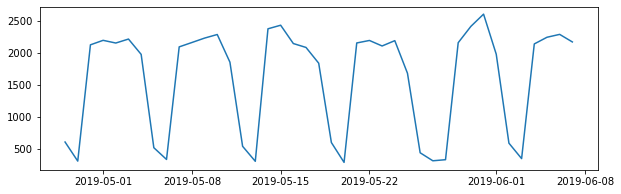

In [66]:
plt.figure(figsize=(10,3))
plt.plot(single_turn['DATE'],single_turn['DAILY_ENTRIES'])

In [63]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST'].UNIT.unique()

array(['R045', 'R046', 'R047', 'R048'], dtype=object)

In [64]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST']['C/A'].unique()

array(['R236', 'R237', 'R237B', 'R238', 'R238A', 'R240', 'R241A'],
      dtype=object)

In [65]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST'].SCP.unique()

array(['00-00-00', '00-00-01', '00-00-02', '00-00-03', '00-00-04',
       '00-00-05', '00-03-00', '00-03-01', '00-03-02', '00-03-03',
       '00-06-00', '00-06-01', '01-00-00', '01-00-01', '01-00-02',
       '01-00-03', '01-00-04', '01-00-05', '01-00-06', '00-00-06',
       '00-00-07', '00-03-04', '00-05-00', '00-05-01', '00-06-02',
       '02-00-00', '02-00-01', '02-00-02', '02-00-03', '02-00-04',
       '02-03-00', '02-03-01', '02-03-02', '00-03-05', '00-03-06',
       '00-03-07', '00-03-08'], dtype=object)

## Challenge 5

In [75]:
df_c5 = df_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).agg({'DAILY_ENTRIES': 'sum', 'PREV_ENTRIES': 'sum', 
                                                                  'ENTRIES': 'sum'}).reset_index()

In [76]:
df_c5.head()

C/A  UNIT STATION       DATE  DAILY_ENTRIES  PREV_ENTRIES   ENTRIES
0  A002  R051   59 ST 2019-04-28         8394.0    55109712.0  55118106
1  A002  R051   59 ST 2019-04-29         6337.0    55118106.0  55124443
2  A002  R051   59 ST 2019-04-30        13132.0    55124443.0  55137575
3  A002  R051   59 ST 2019-05-01        13664.0    55137575.0  55151239
4  A002  R051   59 ST 2019-05-02        13748.0    55151239.0  55164987

## Challenge 6

In [78]:
df_c6 = df_daily.groupby(['STATION', 'DATE']).agg({'DAILY_ENTRIES': 'sum', 'PREV_ENTRIES': 'sum', 
                                                                  'ENTRIES': 'sum'}).reset_index()

In [79]:
df_c6.head()

STATION       DATE  DAILY_ENTRIES  PREV_ENTRIES     ENTRIES
0    1 AV 2019-04-28         6338.0  1.413315e+09  1413321232
1    1 AV 2019-04-29         4555.0  1.413321e+09  1413325787
2    1 AV 2019-04-30        18018.0  1.413326e+09  1413343805
3    1 AV 2019-05-01        18923.0  1.413344e+09  1413362728
4    1 AV 2019-05-02        19226.0  1.413363e+09  1413381954

## Challenge 7

In [89]:
df_c6_bb = df_c6[df_c6.STATION == 'BROOKLYN BRIDGE'].reset_index()
df_c6_bb.shape

(41, 6)

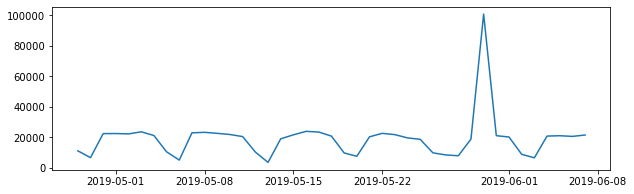

In [83]:
plt.figure(figsize=(10,3))
plt.plot(df_c6_bb['DATE'],df_c6_bb['DAILY_ENTRIES'])
#plt.xticks(['2019-05-12', '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16'])
#plt.xlim(['2019-05-27', '2019-06-05'])
#plt.ylim([0.1e10,1e10])

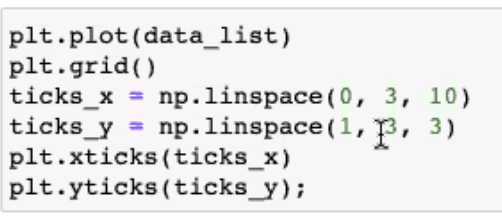

## Challenge 8

In [148]:
weekday = df_c6_bb.drop(['PREV_ENTRIES', 'ENTRIES', 'index'], axis = 1)

In [149]:
weekday.head()

STATION       DATE  DAILY_ENTRIES
0  BROOKLYN BRIDGE 2019-04-28        11143.0
1  BROOKLYN BRIDGE 2019-04-29         6712.0
2  BROOKLYN BRIDGE 2019-04-30        22427.0
3  BROOKLYN BRIDGE 2019-05-01        22469.0
4  BROOKLYN BRIDGE 2019-05-02        22231.0

In [165]:
weekday['WEEKDAY'] = weekday['DATE'].dt.day_name()
weekday['WEEK'] = weekday['DATE'].dt.week
weekday.head()

STATION       DATE  DAILY_ENTRIES    WEEKDAY  WEEK
0  BROOKLYN BRIDGE 2019-04-28        11143.0     Sunday    17
1  BROOKLYN BRIDGE 2019-04-29         6712.0     Monday    18
2  BROOKLYN BRIDGE 2019-04-30        22427.0    Tuesday    18
3  BROOKLYN BRIDGE 2019-05-01        22469.0  Wednesday    18
4  BROOKLYN BRIDGE 2019-05-02        22231.0   Thursday    18